# Exercises 08

For convenience, let's import important packages first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Scipy Exercises

### Integration using Scipy

Use scipy to get the area under a curve using the Simpson's rule (`simps` function). For more information see https://en.wikipedia.org/wiki/Simpson%27s_rule

Load the data `measured_data.csv` that contains values separated by `,` and a description in its first row

In [13]:
from scipy.integrate import simps

def integrate(filename):
    ### BEGIN SOLUTION
    data = np.loadtxt(filename, delimiter=",", skiprows=1)
    return simps(data[:,1],data[:,0]) 
    ### END SOLUTION

In [14]:
# Check your results:
integrate("measured_data.csv")

8.932125000000001

In [15]:
# numpy assert
np.testing.assert_almost_equal(integrate("measured_data.csv"), 8.9321, 4)

### Curve fitting exercises

#### Fit a Gaussian function

Use non-linear least squares to fit a function, f, to data.

In mathematics, a Gaussian function, often simply referred to as a Gaussian, is a function of the form

$$f(x) = a e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

for arbitrary real number constants $a$, $\mu$ and non zero $\sigma$. The Gaussian is a characteristic symmetric "bell curve" shape
The parameter $a$ is the height of the curve's peak, $\mu$ (mean) is the position of the center of the peak and $\sigma$ (the standard deviation) controls the width of the "bell".

[https://en.wikipedia.org/wiki/Gaussian_function]

Use `curve_fit` to get the parameters $a$, $\mu$, and $\sigma$.

Warning: Using the previous equation can lead to negative $\sigma$ values. Fit to the squared of it instead, or use the absolute number.

Optionally, plot the original data and the one with the parameters from `curve_fit`.

In [16]:
from scipy.optimize import curve_fit

def get_a_mu_sigma(filename):
    """
    Create a gaussian function
    Get the data from a given file (filename).
    Use it as an input to curve_fit function.
    Return the values of a, mu, and sigma
    """
    
    ### BEGIN SOLUTION

    def gaussian(x, a, mean, sigma2):
        return a * np.exp(-((x - mean)**2 / (2.*sigma2)))
    
    x_y_data = np.loadtxt(filename, delimiter=",", skiprows=1)
    x, y = x_y_data[:,0], x_y_data[:,1]

    mu_0 = y.mean()
    sigma_0 = y.std()

    popt, pcov = curve_fit(gaussian, x, y, [1, mu_0, sigma_0*sigma_0])
    a, mu, sigma2 = popt[0], popt[1], popt[2]
    

    
    sigma = np.sqrt(sigma2)
    return round(a,4), round(mu,4), round(sigma,4)
    ### END SOLUTION

In [17]:
# Check your results 
a, mu, sigma = get_a_mu_sigma("measured_data.csv")
a, mu, sigma

(1.1, 15.0372, 3.1398)

In [18]:
np.testing.assert_almost_equal(get_a_mu_sigma("measured_data.csv"), (1.1, 15.0372, 3.1398), 3)

#### Plot the gaussian curve 

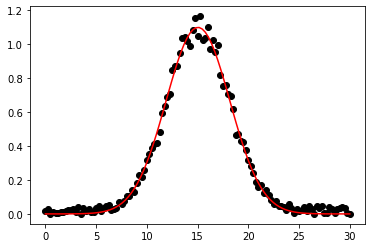

In [19]:

def gaussian(x, a, mean, sigma2):
    return a * np.exp(-((x - mean)**2 / (2.*sigma2)))

data = np.loadtxt("measured_data.csv", delimiter=",", skiprows=1)
x, y = data[:,0], data[:,1]


plt.scatter(x, y, color="black")
xlin = np.linspace(0, 30, 100)
sigma2 = sigma*sigma
plt.plot(xlin, gaussian(xlin, a, mu, sigma2), color="red")
plt.savefig('curve_fit.png')
plt.show()

The result should look like this one
<img src="curve_fit.png" alt="Drawing" style="width: 600px;"/>

### Linear fitting exercises

#### Use the `linregress` function

Calculate a linear least-squares regression for two sets of measurements (`measured_data_2.csv` data).

Get the slope, intercept and R$^2$.

In [20]:
from scipy.stats import spearmanr, pearsonr, linregress

def get_slope_intercept_r2(filename):
    ### BEGIN SOLUTION
    data = np.loadtxt(filename, delimiter=",", skiprows=1)
    x, y = data[:,0], data[:,1]
    lr = linregress(x,y)
    return lr.slope, lr.intercept, lr.rvalue*lr.rvalue
    ### END SOLUTION


In [21]:
# Check your results 
slope, intercept, r2 = get_slope_intercept_r2("measured_data_2.csv")
slope, intercept, r2 

(2.850686039324596, 2.90369, 0.9728906358440953)

In [22]:
np.testing.assert_almost_equal(get_slope_intercept_r2("measured_data_2.csv"), [2.9, 2.9, 1. ], 1)

#### Plot your results

Use `plt.text` to insert text

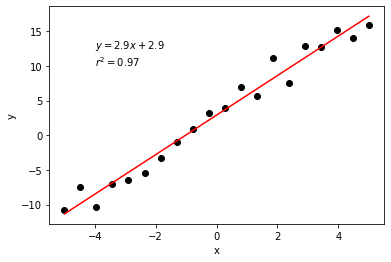

In [23]:
data = np.loadtxt("measured_data_2.csv", delimiter=",", skiprows=1)
x, y = data[:,0], data[:,1]

xlin = np.linspace(-5,5,10)
y_fit = xlin * slope + intercept # get the regression line
plt.scatter(x, y, color="black")
plt.plot(xlin, y_fit, color="red")

params_of_interest = slope, intercept, r2
line1 = '$y = {:.1f}x + {:.1f}$'
line2 = '$r^2 = {:.2f}$'
template_text = line1 + '\n' + line2
plt.text(-4, 10, template_text.format(*params_of_interest))
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("linregress.png")
plt.show()


The result should look like this one
<img src="linregress.png" alt="Drawing" style="width: 600px;"/>

### Statistical exercises

#### Calculate the mean and standard error of the mean

Calculate the mean and standard error of the mean of the data `measured_data_3.csv`. Calculte those values per condition: `control`, `A`, `B` and `C`.

In [24]:
def get_means_sems(filename):
    ### BEGIN SOLUTION
    data = pd.read_csv(filename)
    return data.mean(), data.sem()
    ### END SOLUTION

In [25]:
# Check your results 
means, sems = get_means_sems("measured_data_3.csv")
means, sems

(control    1.5680
 A          1.5555
 B          2.6080
 C          8.4445
 dtype: float64,
 control    0.194956
 A          0.272266
 B          0.302106
 C          0.506534
 dtype: float64)

In [26]:
np.testing.assert_almost_equal(get_means_sems("measured_data_3.csv"), [[1.568 , 1.5555, 2.608 , 8.4445], [0.1949556 , 0.27226581, 0.30210629, 0.50653387]], 3)

#### Calculate the p-values

Calculate t-test between the `control` condition and the conditions `A`, `B` and `C`. Get the p-values.

In [35]:
from scipy.stats import ttest_ind

def get_pvalues(filename):
    ### BEGIN SOLUTION
    data = pd.read_csv(filename)
    return [ttest_ind(data["control"], data[condition]).pvalue for condition in ["A", "B", "C"]]
    ### END SOLUTION

In [30]:
get_pvalues("measured_data_3.csv")


[0.9704187525026002, 0.006292545269111063, 3.239360701254221e-15]

In [31]:
np.testing.assert_almost_equal(get_pvalues("measured_data_3.csv"), [0.9704187525026002, 0.006292545269111063, 3.239360701254221e-15], 3)

#### Plot your results


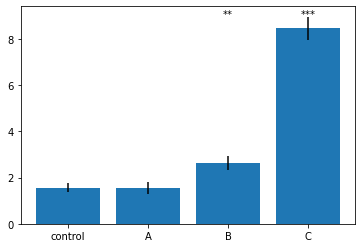

In [36]:
from scipy.stats import ttest_ind

fig, ax = plt.subplots()

data = pd.read_csv("measured_data_3.csv")
means = data.mean()
sems = data.sem()
ax.bar(data.columns, means, yerr=sems)


for i, condition in enumerate(["A", "B", "C"]):
    p_value = ttest_ind(data["control"], data[condition]).pvalue # t test
    sig = None
    if p_value <= 0.001:
        sig = '***'
    elif p_value <= 0.01:
        sig = '**'
    elif p_value <= 0.05:
        sig = '*'
    if sig:
        pos_x = i + 1 
        pos_y = (df.mean() + sems).max()
        ax.text(pos_x, pos_y, sig, ha='center')

plt.savefig("bar-ttest_ind.png")
plt.show()

The result should look like this one
<img src="bar-ttest_ind.png" alt="Drawing" style="width: 600px;"/>